In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Obesity.csv')

In [ ]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

#Arredondar as colunas de escala

In [ ]:
cols_round = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in cols_round:
    df[col] = df[col].round().astype(int)

#Converter para category



In [ ]:
cols_cat = [
    'Gender', 'family_history', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity'
]

for col in cols_cat:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          2111 non-null   category
 1   Age             2111 non-null   float64 
 2   Height          2111 non-null   float64 
 3   Weight          2111 non-null   float64 
 4   family_history  2111 non-null   category
 5   FAVC            2111 non-null   category
 6   FCVC            2111 non-null   int64   
 7   NCP             2111 non-null   int64   
 8   CAEC            2111 non-null   category
 9   SMOKE           2111 non-null   category
 10  CH2O            2111 non-null   int64   
 11  SCC             2111 non-null   category
 12  FAF             2111 non-null   int64   
 13  TUE             2111 non-null   int64   
 14  CALC            2111 non-null   category
 15  MTRANS          2111 non-null   category
 16  Obesity         2111 non-null   category
dtypes: category(9)

#Análise Exploratória (EDA Estratégica)

In [ ]:
df['Obesity'].value_counts()

,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


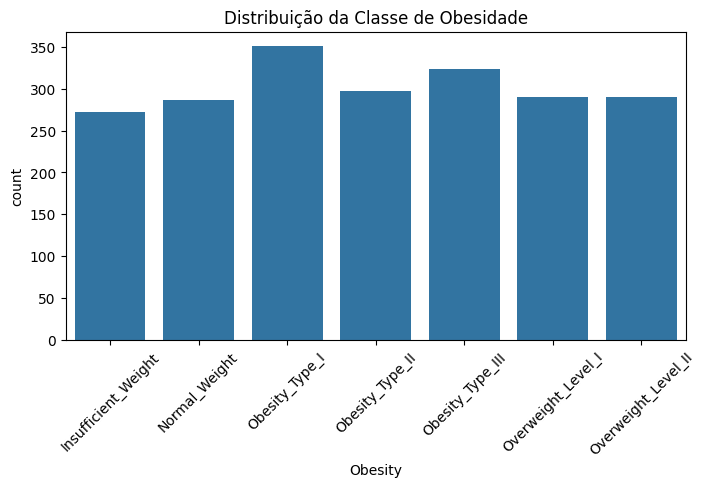

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Obesity')
plt.xticks(rotation=45)
plt.title('Distribuição da Classe de Obesidade')
plt.show()

#Separar X e y

In [ ]:
X = df.drop('Obesity', axis=1)
y = df['Obesity']

In [ ]:
#Dividir treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Criar pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
import joblib
joblib.dump(pipeline, 'model_pipeline.joblib')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

0.9408983451536643

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.78      0.90      0.83        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.86      0.88        58
Overweight_Level_II       0.98      0.95      0.96        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.94      0.94       423



#Matriz de Confusão

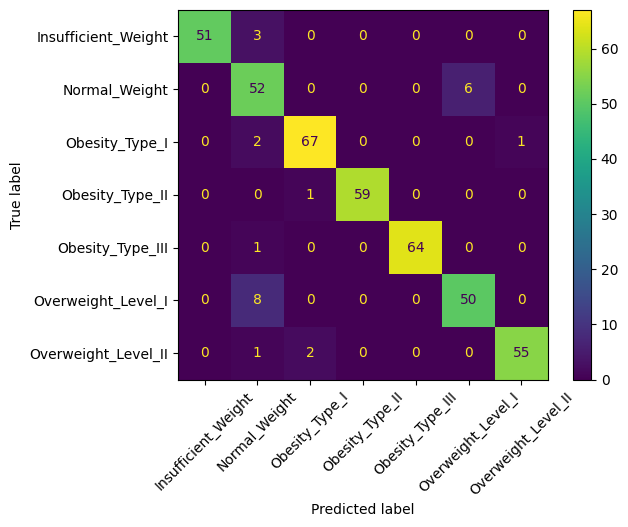

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.show()

#Criar varíaveis - IMC

> Adicionar aspas



In [ ]:
df['IMC'] = df['Weight'] / (df['Height'] ** 2)

In [ ]:
df.groupby('Obesity')['IMC'].mean().sort_values()

/tmp/ipython-input-715308394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Obesity')['IMC'].mean().sort_values()


,IMC
Obesity,
Insufficient_Weight,17.404245
Normal_Weight,22.014147
Overweight_Level_I,25.990772
Overweight_Level_II,28.215232
Obesity_Type_I,32.255636
Obesity_Type_II,36.723424
Obesity_Type_III,42.273746


#Criar varíaveis - Atividade Física (FAF) x Obesidade




In [ ]:
pd.crosstab(df['FAF'], df['Obesity'])

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAF,,,,,,,
0,72,80,131,69,187,84,97
1,72,97,123,165,68,126,125
2,117,69,72,63,69,56,50
3,11,41,25,0,0,24,18


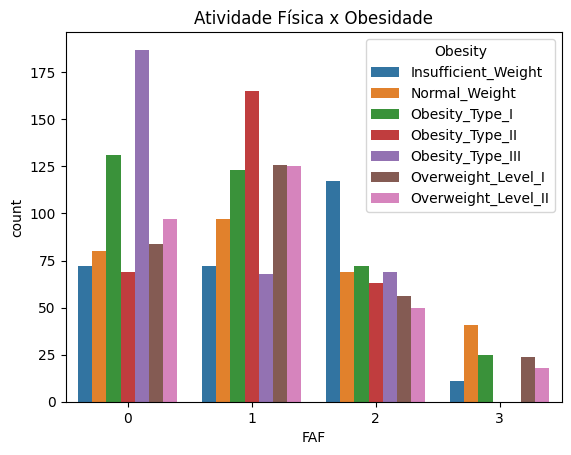

In [ ]:
sns.countplot(data=df, x='FAF', hue='Obesity')
plt.title('Atividade Física x Obesidade')
plt.show()

#Consumo de alimentos calóricos (FAVC)


In [ ]:
pd.crosstab(df['FAVC'], df['Obesity'])

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,51,79,11,7,1,22,74
yes,221,208,340,290,323,268,216


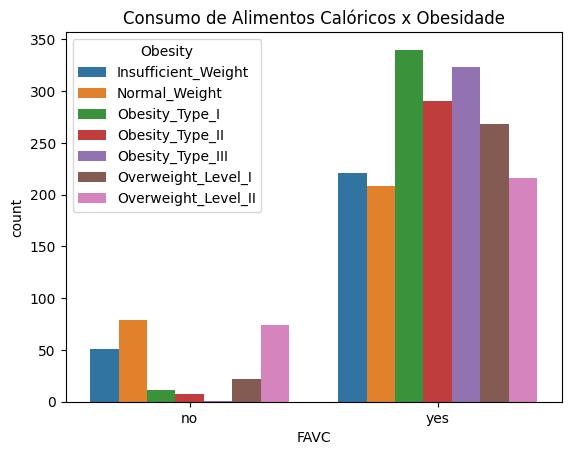

In [ ]:
sns.countplot(data=df, x='FAVC', hue='Obesity')
plt.title('Consumo de Alimentos Calóricos x Obesidade')
plt.show()

#Criar varíaveis - Consumo de água (CH2O)


In [ ]:
pd.crosstab(df['CH2O'], df['Obesity'])

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CH2O,,,,,,,
1,84,83,68,82,61,60,47
2,142,164,173,177,114,154,186
3,46,40,110,38,149,76,57


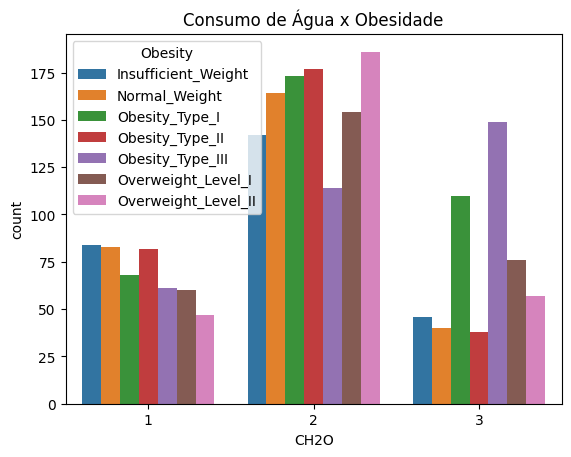

In [ ]:
sns.countplot(data=df, x='CH2O', hue='Obesity')
plt.title('Consumo de Água x Obesidade')
plt.show()

In [ ]:
df.to_csv('obesity_tratado.csv', index=False)

In [ ]:
df['IMC'] = df['Weight'] / (df['Height'] ** 2)

In [ ]:
from google.colab import files
files.download('obesity_tratado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['IMC'] = (df['Weight'] / (df['Height'] ** 2)).round(2)

In [ ]:
df.to_csv('obesity_tratado.csv', index=False, decimal='.')

In [ ]:
df['IMC'] = (df['Weight'] / (df['Height'] ** 2)).round(2)
df.to_csv('obesity_tratado.csv', index=False, decimal='.')

In [ ]:
from google.colab import files
files.download('obesity_tratado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>